In [1]:
using Pkg
import Pkg; Pkg.add("PrettyTables")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


1024×1024 Matrix{ComplexF64}:
  0.0111063+0.0314964im   …   0.00518457-0.00933955im
  0.0320249+0.0071649im        0.0331709-0.00380141im
  0.0107728+0.0294101im        0.0039728+0.0099044im
  0.0260457+0.011268im         0.0117155+0.0207394im
  0.0056685+0.0227288im       0.00452267+0.0189im
 0.00808569+0.00452235im  …   0.00441191-0.00533757im
   0.012079+0.00225997im      0.00626013+0.0414236im
  0.0130091+0.0101239im       -0.0190043-0.00421242im
   0.026855+0.0133395im      0.000799349-0.010826im
  0.0246446+0.00849264im      0.00702479+0.0135777im
           ⋮              ⋱  
  0.0236592+0.00439363im  …    0.0123547-0.00887179im
  0.0259128+0.0140356im        0.0144029+0.0194081im
  0.0055232+0.0304128im       -0.0277271-0.0210469im
  0.0257286+0.0172291im       0.00161344-0.0178251im
  0.0289858+0.0252063im       0.00488851+0.0104946im
 0.00681236+0.0326331im   …   -0.0134433+0.00977758im
  0.0071761+0.0114415im       -0.0404267+0.0144766im
  0.0103992+0.0128221im       0.00544

Approximate Identity Matrix:4.780585964491197e-14


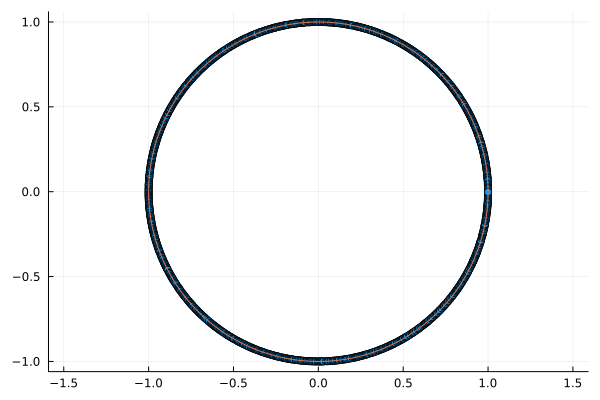

In [2]:

using Random
using LinearAlgebra
using Plots
using PrettyTables
N = 1024
A = rand(N, N)
B = rand(N, N)
Z = A + im * B

Q, R = qr(Z)
M = zeros(N, N) 
for i = 1:N
    for j = 1:N
        if i == j
            M[i, j] = R[i, j] / abs(R[i, j])
        else
            M[i, j] = 0
        end
    end
end
H = Q * M
display(H)
I_approx = H * H'
println("Approximate Identity Matrix:", norm(I - I_approx))
eigenvalues = eigvals(H)
scatter(real(eigenvalues), imag(eigenvalues), legend=true, ratio=1)
plot!(cos.(LinRange(0, 2π, 1000)), sin.(LinRange(0, 2π, 1000)), legend=false)

In [3]:
open("Haar.txt", "w") do file
    for i = 1:N
    
            real_part = real(H[1, i])
            imag_part = imag(H[1, i])
            write(file, "$real_part + $imag_part im\n")
    end
end